In [101]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [102]:
# We need, for a put and call separately, to determine which features are important
# a way to do this is like almeida, by leaving one out, and see how much the IVRMSE increases

# First, we need the performance of the best covconvlstm model

In [103]:
folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
target_substring = "_covconvLSTMNEW"  # the substring to look for
step = "h_1_"
option = 'call'

lowest_value = float('inf')
lowest_file_short = None
i = 0
for file_name in os.listdir(folder_path):
   
    if file_name.endswith('.npy') and target_substring in file_name and step in file_name and option in file_name:
        i=i+1
        file_path = os.path.join(folder_path, file_name)
        try:
            value = np.load(file_path)
            # If the file contains a single number
        
            if value < lowest_value:
                lowest_value = value
                lowest_file_short = file_name
                

        except Exception as e:
            print(f"Error loading {file_name}: {e}")

print(f"Lowest value: {lowest_value}")
print(f"From file: {lowest_file_short}")
print(i)


Lowest value: 0.11659019596456228
From file: call_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_RVOL_TMS_CRS_EPU_ADS_2_7_4_covconvLSTMNEW.npy
4


In [105]:
option, _, _, _, ws, _, h_step, _, _, _, _, _, _, _,  _, num_head, key_dim, _, _= lowest_file_short.split("_")

In [106]:
test_ivrmse = np.load(f"results/test_short_ttm/ivrmse/{lowest_file_short}")
test_roos = np.load(f"results/test_short_ttm/r_oos/{lowest_file_short}")

print(f"h = {h_step} ahead prediction for {option} option:")
print(f"IVRMSE: {test_ivrmse:.3f}, R_oos: {test_roos:.3f}")
print(f"Best hyperparameters: window size {ws}, num layers: {num_head}, kernel height: {key_dim}")
best_call = test_ivrmse

h = 1 ahead prediction for call option:
IVRMSE: 0.125, R_oos: 0.970
Best hyperparameters: window size 21, num layers: 2, kernel height: 7


In [108]:
folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
target_substring = "_covconvLSTMNEW"  # the substring to look for
step = "h_1_"
option = 'put'

lowest_value = float('inf')
lowest_file_short = None
i = 0
for file_name in os.listdir(folder_path):
   
    if file_name.endswith('.npy') and target_substring in file_name and step in file_name and option in file_name:
        i=i+1
        file_path = os.path.join(folder_path, file_name)
        try:
            value = np.load(file_path)
            # If the file contains a single number
        
            if value < lowest_value:
                lowest_value = value
                lowest_file_short = file_name
                

        except Exception as e:
            print(f"Error loading {file_name}: {e}")

print(f"Lowest value: {lowest_value}")
print(f"From file: {lowest_file_short}")
print(i)
option, _, _, _, ws, _, h_step, _, _, _, _, _, _, _,  _, num_head, key_dim, _, _= lowest_file_short.split("_")

test_ivrmse = np.load(f"results/test_short_ttm/ivrmse/{lowest_file_short}")
test_roos = np.load(f"results/test_short_ttm/r_oos/{lowest_file_short}")

print(f"h = {h_step} ahead prediction for {option} option:")
print(f"IVRMSE: {test_ivrmse:.3f}, R_oos: {test_roos:.3f}")
print(f"Best hyperparameters: window size {ws}, num layers: {num_head}, kernel height: {key_dim}")
best_put = test_ivrmse

Lowest value: 0.10157577252409732
From file: put_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_RVOL_TMS_CRS_EPU_ADS_2_7_4_covconvLSTMNEW.npy
4
h = 1 ahead prediction for put option:
IVRMSE: 0.133, R_oos: 0.959
Best hyperparameters: window size 21, num layers: 2, kernel height: 7


In [109]:
print(best_call, best_put)

0.1246512106475451 0.13314423327850386


In [110]:
# Notice that both hyperparamters are the same for call and put: 

In [111]:
# ws = 21, layers = 2, k_height= 7

In [112]:
# Now, we need to obtain the IVRMSE scores of the runs where one covariate is omitted at one time

covs = ['_VIX_', 'VVIX', 'SKEW', 'RVOL','TMS', 'CRS', 'EPU', 'ADS']
feature_importance_put = []

for j in covs:
    print(j)

    folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
    target_substring = "feature_importancev2"  # the substring to look for
    step = "h_1"
    option = 'put'

    lowest_value = float('inf')
    lowest_file_short = None
    i = 0
    for file_name in os.listdir(folder_path):
        
        if file_name.endswith('.npy') and \
            (target_substring in file_name and step in file_name and option in file_name) \
                and (j not in file_name) and (len(file_name.split("_"))>11):
            i=i+1
            file_path = os.path.join(folder_path, file_name)
            try:
                value = np.load(file_path)
                # If the file contains a single number
            
                if value < lowest_value:
                    lowest_value = value
                    lowest_file_short = file_name
                    

            except Exception as e:
                print(f"Error loading {file_name}: {e}")

    print(f"Lowest value: {lowest_value}")
    print(f"From file: {lowest_file_short}")
    # print(i)
    # print(lowest_file_short)
    option, _, _, _, ws, _, h_step, _, _, _, _, _, _,  _, _, _= lowest_file_short.split("_")
    test_ivrmse = np.load(f"results/test_short_ttm/ivrmse/{lowest_file_short}")
    test_roos = np.load(f"results/test_short_ttm/r_oos/{lowest_file_short}")

    # print(f"h = {h_step} ahead prediction for {option} option:")
    # print(f"IVRMSE: {test_ivrmse:.3f}, R_oos: {test_roos:.3f}")
    # print(f"Best hyperparameters: window size {ws}, num layers: {num_head}, kernel height: {key_dim}")

    feature_importance_put.append(test_ivrmse - best_put)
print(covs)
print(feature_importance_put)

_VIX_
Lowest value: 0.13464545105228193
From file: put_smooth_True_ws_5_h_1_VVIX_SKEW_RVOL_TMS_CRS_EPU_ADS_feature_importancev2.npy
VVIX
Lowest value: 0.12453565999954558
From file: put_smooth_True_ws_21_h_1_VIX_SKEW_RVOL_TMS_CRS_EPU_ADS_feature_importancev2.npy


SKEW
Lowest value: 0.14386122104326887
From file: put_smooth_True_ws_21_h_1_VIX_VVIX_RVOL_TMS_CRS_EPU_ADS_feature_importancev2.npy
RVOL
Lowest value: 0.13789757716309084
From file: put_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_TMS_CRS_EPU_ADS_feature_importancev2.npy
TMS
Lowest value: 0.12082812664318025
From file: put_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_RVOL_CRS_EPU_ADS_feature_importancev2.npy
CRS
Lowest value: 0.1320108103578375
From file: put_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_RVOL_TMS_EPU_ADS_feature_importancev2.npy
EPU
Lowest value: 0.12493085103104562
From file: put_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_RVOL_TMS_CRS_ADS_feature_importancev2.npy
ADS
Lowest value: 0.1260447305955685
From file: put_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_RVOL_TMS_CRS_EPU_feature_importancev2.npy
['_VIX_', 'VVIX', 'SKEW', 'RVOL', 'TMS', 'CRS', 'EPU', 'ADS']
[0.06796375776706534, 0.05592060080685199, 0.06264799716745514, 0.09581695945729682, 0.02972036506655079, 0.035336699611231176, 0.02915490221265446, 0.027

In [113]:

covs = ['_VIX_', 'VVIX', 'SKEW', 'RVOL','TMS', 'CRS', 'EPU', 'ADS']
feature_importance_call = []

for j in covs:
    print(j)

    folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
    target_substring = "feature_importanceNEWv2"  # the substring to look for
    step = "h_1"
    option = 'call'

    lowest_value = float('inf')
    lowest_file_short = None
    i = 0
    for file_name in os.listdir(folder_path):
        
        if file_name.endswith('.npy') and \
            (target_substring in file_name and step in file_name and option in file_name) \
                and (j not in file_name) and (len(file_name.split("_"))>11):
            i=i+1
            file_path = os.path.join(folder_path, file_name)
            try:
                value = np.load(file_path)
                # If the file contains a single number
            
                if value < lowest_value:
                    lowest_value = value
                    lowest_file_short = file_name
                    

            except Exception as e:
                print(f"Error loading {file_name}: {e}")

    print(f"Lowest value: {lowest_value}")
    print(f"From file: {lowest_file_short}")
    # print(i)
    # print(lowest_file_short)
    option, _, _, _, ws, _, h_step, _, _, _, _, _, _,  _, _, _= lowest_file_short.split("_")
    test_ivrmse = np.load(f"results/test_short_ttm/ivrmse/{lowest_file_short}")
    test_roos = np.load(f"results/test_short_ttm/r_oos/{lowest_file_short}")

    # print(f"h = {h_step} ahead prediction for {option} option:")
    # print(f"IVRMSE: {test_ivrmse:.3f}, R_oos: {test_roos:.3f}")
    # print(f"Best hyperparameters: window size {ws}, num layers: {num_head}, kernel height: {key_dim}")

    feature_importance_call.append(test_ivrmse - best_call)
print(covs)
print(feature_importance_call)

_VIX_
Lowest value: 0.12322085916184783
From file: call_smooth_True_ws_21_h_1_VVIX_SKEW_RVOL_TMS_CRS_EPU_ADS_feature_importanceNEWv2.npy
VVIX
Lowest value: 0.126480551622533
From file: call_smooth_True_ws_21_h_1_VIX_SKEW_RVOL_TMS_CRS_EPU_ADS_feature_importanceNEWv2.npy
SKEW
Lowest value: 0.13311048258750738
From file: call_smooth_True_ws_21_h_1_VIX_VVIX_RVOL_TMS_CRS_EPU_ADS_feature_importanceNEWv2.npy
RVOL
Lowest value: 0.12317059185049756
From file: call_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_TMS_CRS_EPU_ADS_feature_importanceNEWv2.npy
TMS
Lowest value: 0.11832447953994057
From file: call_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_RVOL_CRS_EPU_ADS_feature_importanceNEWv2.npy
CRS
Lowest value: 0.12815711609662417
From file: call_smooth_True_ws_5_h_1_VIX_VVIX_SKEW_RVOL_TMS_EPU_ADS_feature_importanceNEWv2.npy
EPU
Lowest value: 0.12830737531527622
From file: call_smooth_True_ws_5_h_1_VIX_VVIX_SKEW_RVOL_TMS_CRS_ADS_feature_importanceNEWv2.npy
ADS
Lowest value: 0.13601251885084822
From file: call_smo

In [114]:
covs[0] = "VIX"

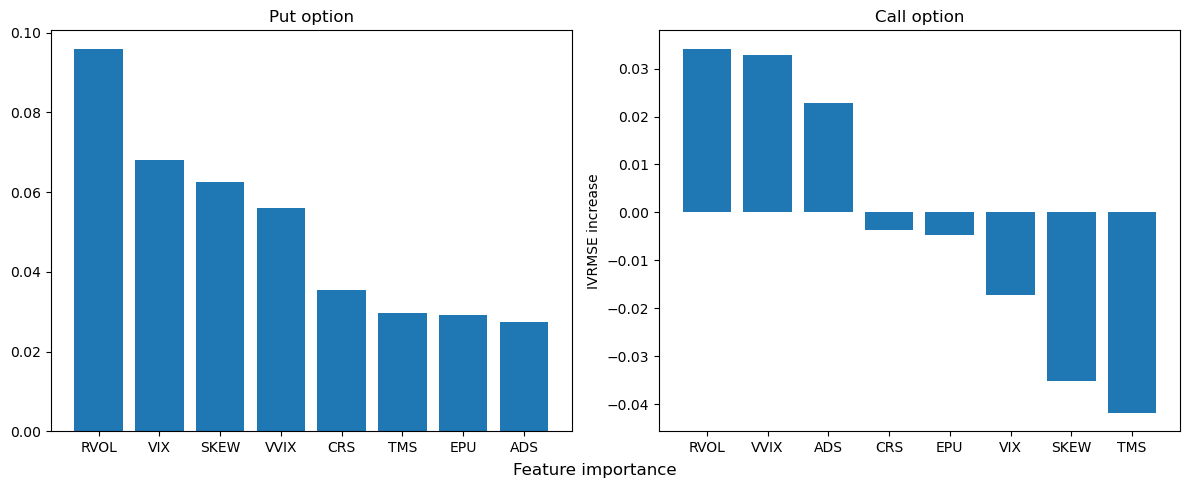

In [124]:
sorted_pairs1 = sorted(zip(feature_importance_call, covs), reverse=True)
values1_sorted, labels_sorted1 = zip(*sorted_pairs1)

# Sort values2 + labels
sorted_pairs2 = sorted(zip(feature_importance_put, covs), reverse=True)
values2_sorted, labels_sorted2 = zip(*sorted_pairs2)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Plot Set 1
axes[0].bar(labels_sorted2, values2_sorted)
axes[0].set_title('Put option')
axes[0].set_ylim(bottom=0)

axes[1].bar(labels_sorted1, values1_sorted)
axes[1].set_title('Call option')
axes[1].set_ylabel('IVRMSE increase')

# Plot Set 2


fig.text(0.5, 0.04, 'Feature importance', ha='center', fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for xlabel

plt.show()


Just exploration after this point,

original without the covconvlstm framework is different, and more extensively tested wit hyperparameters.
May not be as good as a metric as the previous figure

In [117]:
# original without features

folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
target_substring = "fixed"  # the substring to look for
step = "h_1_"
option = 'call'

lowest_value = float('inf')
lowest_file_short = None
i = 0
for file_name in os.listdir(folder_path):
   
    if file_name.endswith('.npy') and target_substring in file_name and step in file_name and option in file_name:
        i=i+1
        file_path = os.path.join(folder_path, file_name)
        try:
            value = np.load(file_path)
            # If the file contains a single number
        
            if value < lowest_value:
                lowest_value = value
                lowest_file_short = file_name
                

        except Exception as e:
            print(f"Error loading {file_name}: {e}")

print(f"Lowest value: {lowest_value}")
print(f"From file: {lowest_file_short}")
print(i)
option, _, _, _, ws, _, h_step, num_head, key_dim, _, _= lowest_file_short.split("_")

test_ivrmse = np.load(f"results/test_short_ttm/ivrmse/{lowest_file_short}")
test_roos = np.load(f"results/test_short_ttm/r_oos/{lowest_file_short}")

print(f"h = {h_step} ahead prediction for {option} option:")
print(f"IVRMSE: {test_ivrmse:.3f}, R_oos: {test_roos:.3f}")
print(f"Best hyperparameters: window size {ws}, num layers: {num_head}, kernel height: {key_dim}")
best_call = test_ivrmse


Lowest value: 0.1379967169341764
From file: call_smooth_True_ws_63_h_1_2_7_4_fixed.npy
12
h = 1 ahead prediction for call option:
IVRMSE: 0.190, R_oos: 0.538
Best hyperparameters: window size 63, num layers: 2, kernel height: 7


In [118]:
# Now here, do we do something where we add one feature?
covs = ['_VIX_', 'VVIX', 'SKEW', 'RVOL','TMS', 'CRS', 'EPU', 'ADS']
feature_importance_call = []

for j in covs:
    print(j)

    folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
    target_substring = "feature_importancev2"  # the substring to look for
    step = "h_1"
    option = 'call'

    lowest_value = float('inf')
    lowest_file_short = None
    i = 0
    for file_name in os.listdir(folder_path):
        
        if file_name.endswith('.npy') and \
            (target_substring in file_name and step in file_name and option in file_name) \
                and (j in file_name) and (len(file_name.split("_"))<11):
            i=i+1
            file_path = os.path.join(folder_path, file_name)
            try:
                value = np.load(file_path)
                # If the file contains a single number
            
                if value < lowest_value:
                    lowest_value = value
                    lowest_file_short = file_name
                    

            except Exception as e:
                print(f"Error loading {file_name}: {e}")

    print(f"Lowest value: {lowest_value}")
    print(f"From file: {lowest_file_short}")
    # print(i)
    # print(lowest_file_short)
    option, _, _, _, ws, _, h_step,  _, _, _= lowest_file_short.split("_")
    test_ivrmse = np.load(f"results/test_short_ttm/ivrmse/{lowest_file_short}")
    test_roos = np.load(f"results/test_short_ttm/r_oos/{lowest_file_short}")

    # print(f"h = {h_step} ahead prediction for {option} option:")
    # print(f"IVRMSE: {test_ivrmse:.3f}, R_oos: {test_roos:.3f}")
    # print(f"Best hyperparameters: window size {ws}, num layers: {num_head}, kernel height: {key_dim}")

    feature_importance_call.append(best_call - test_ivrmse)
print(covs)
print(feature_importance_call)

_VIX_
Lowest value: 0.12270889431565445
From file: call_smooth_True_ws_21_h_1_VIX_feature_importancev2.npy
VVIX
Lowest value: 0.12033210741580908
From file: call_smooth_True_ws_63_h_1_VVIX_feature_importancev2.npy
SKEW
Lowest value: 0.12619011129715865
From file: call_smooth_True_ws_21_h_1_SKEW_feature_importancev2.npy
RVOL
Lowest value: 0.12171581005509131
From file: call_smooth_True_ws_21_h_1_RVOL_feature_importancev2.npy
TMS
Lowest value: 0.12591677667122153
From file: call_smooth_True_ws_63_h_1_TMS_feature_importancev2.npy
CRS
Lowest value: 0.1217572193536745
From file: call_smooth_True_ws_21_h_1_CRS_feature_importancev2.npy
EPU
Lowest value: 0.12316250727839828
From file: call_smooth_True_ws_21_h_1_EPU_feature_importancev2.npy
ADS
Lowest value: 0.12029368740669384
From file: call_smooth_True_ws_21_h_1_ADS_feature_importancev2.npy
['_VIX_', 'VVIX', 'SKEW', 'RVOL', 'TMS', 'CRS', 'EPU', 'ADS']
[-0.017271944577264914, 0.032913577765670915, -0.03517303334993779, 0.03417310499379894, -0

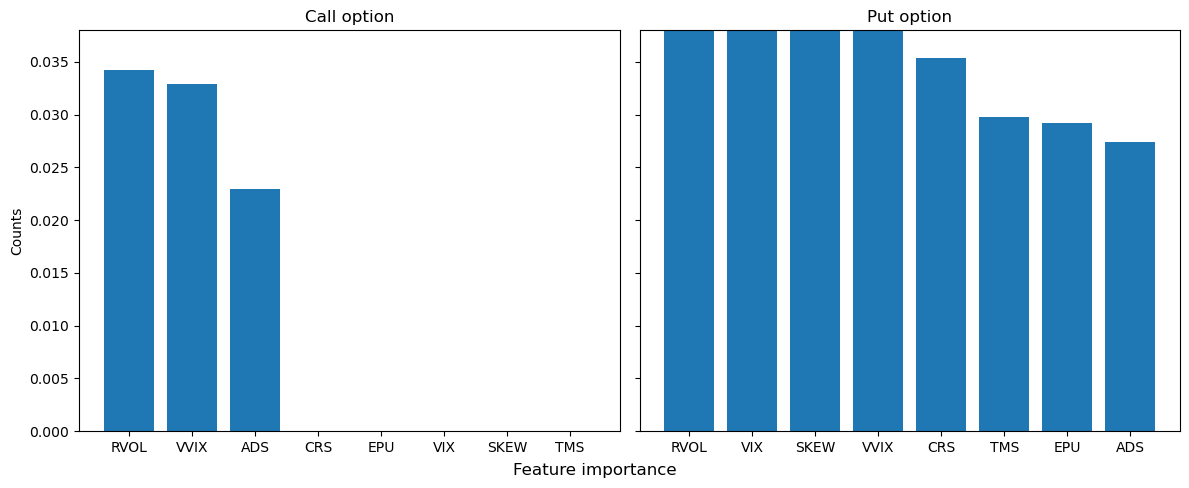

In [119]:
covs[0] = "VIX"
sorted_pairs1 = sorted(zip(feature_importance_call, covs), reverse=True)
values1_sorted, labels_sorted1 = zip(*sorted_pairs1)

# Sort values2 + labels
sorted_pairs2 = sorted(zip(feature_importance_put, covs), reverse=True)
values2_sorted, labels_sorted2 = zip(*sorted_pairs2)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Set 1
axes[0].bar(labels_sorted1, values1_sorted)
axes[0].set_title('Call option')
axes[0].set_ylabel('Counts')
axes[0].set_ylim(bottom=0)

# Plot Set 2
axes[1].bar(labels_sorted2, values2_sorted)
axes[1].set_title('Put option')
axes[1].set_ylim(bottom=0)

fig.text(0.5, 0.04, 'Feature importance', ha='center', fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for xlabel

plt.show()
